In [131]:
import warnings
warnings.filterwarnings(action="ignore")

## scikit-learn 실습

### 1. 타이타닉 데이터 불러오기

In [35]:
import seaborn as sns

data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 2. 전처리 작업 수행

In [37]:
# 중복 열 제거
prep_data = data.drop(columns=['alive', 'who', 'adult_male', 'class', 'embark_town'])

# 결측값이 많은 열 제거
prep_data.drop("deck", axis=1, inplace=True)
prep_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [38]:
# 결측값 제거 후 인덱스 재정렬
prep_data = prep_data.dropna().reset_index(drop=True)
prep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
 8   alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 45.3+ KB


---
#### dropna() 예제

In [39]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 4), columns=['C1', 'C2', 'C3', 'C4'])

# NaN값 넣기
df.loc[[0, 1], 'C1'] = None
df.loc[2, 'C2'] = np.nan
df.loc[2, 'C3'] = np.nan

df

,C1,C2,C3,C4
0,NaN,1.493487,0.674462,-1.221638
1,NaN,-1.178705,-0.592820,-1.480660
2,1.529549,NaN,NaN,1.229548
3,0.797513,0.429830,1.237361,-0.108401
4,0.172060,0.655326,-0.338398,1.593549


In [40]:
# NaN이 있는 행 삭제

df_drop_row = df.dropna(axis=0)
df_drop_row

,C1,C2,C3,C4
3,0.797513,0.429830,1.237361,-0.108401
4,0.172060,0.655326,-0.338398,1.593549


In [41]:
# NaN이 있는 열 삭제

df_drop_col = df.dropna(axis=1)
df_drop_col

,C4
0,-1.221638
1,-1.480660
2,1.229548
3,-0.108401
4,1.593549


In [42]:
# 행에 NaN이 존재하더라도 값이 3개 이상이면 유지하겠다는 의미 (축방향 생략시, default: axis=0)

df_drop_row_thresh = df.dropna(thresh=3)
df_drop_row_thresh

,C1,C2,C3,C4
0,NaN,1.493487,0.674462,-1.221638
1,NaN,-1.178705,-0.592820,-1.480660
3,0.797513,0.429830,1.237361,-0.108401
4,0.172060,0.655326,-0.338398,1.593549


In [43]:
# 열에 NaN이 존재하더라도 값이 4개 이상이면 유지하겠다는 의미

df_drop_col_thresh = df.dropna(thresh=4, axis=1)
df_drop_col_thresh

,C2,C3,C4
0,1.493487,0.674462,-1.221638
1,-1.178705,-0.592820,-1.480660
2,NaN,NaN,1.229548
3,0.429830,1.237361,-0.108401
4,0.655326,-0.338398,1.593549


### 3. 인코딩작업

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#### - sex 열은 문자열이므로 숫자형으로 변환

In [45]:
# male=0, femail=1로 변환
prep_data['sex'] = le.fit_transform(prep_data['sex'])
prep_data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
707,0,3,0,39.0,0,5,29.125,Q,False
708,0,2,1,27.0,0,0,13.000,S,True
709,1,1,0,19.0,0,0,30.000,S,True
710,1,1,1,26.0,0,0,30.000,C,True
711,0,3,1,32.0,0,0,7.750,Q,True


In [46]:
le.classes_

array(['female', 'male'], dtype=object)

#### - embarked 열은 문자열이므로 숫자 자료형으로 변환

In [47]:
from sklearn.preprocessing import OneHotEncoder

embarked_unique = prep_data.embarked.unique()
print("embarked열의 고유한 값:\n", embarked_unique)

ohe = OneHotEncoder()

# fancy indexing은 DataFrame을 반환
embarked_df = prep_data[['embarked']]

# OneHotExcoder는 DataFrame만 입력 가능
ohe.fit(embarked_df)

embarked_ohe = ohe.transform(embarked_df)
embarked_ohe

embarked열의 고유한 값:
 ['S' 'C' 'Q']


<712x3 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

#### - OneHotEncoding 결과를 numpy배열로 변환 후, 다시 DataFrame으로 변환

In [48]:
import pandas as pd

embarked_df = pd.DataFrame(embarked_ohe.toarray(), columns=embarked_unique)
print(embarked_df)
embarked_df.sample(5)

       S    C    Q
0    0.0  0.0  1.0
1    1.0  0.0  0.0
2    0.0  0.0  1.0
3    0.0  0.0  1.0
4    0.0  0.0  1.0
..   ...  ...  ...
707  0.0  1.0  0.0
708  0.0  0.0  1.0
709  0.0  0.0  1.0
710  1.0  0.0  0.0
711  0.0  1.0  0.0

[712 rows x 3 columns]


,S,C,Q
232,0.0,1.0,0.0
172,0.0,0.0,1.0
192,0.0,0.0,1.0
508,1.0,0.0,0.0
212,0.0,0.0,1.0


#### - 인코딩한 DataFrame을 학습데이터 DataFrame에 합쳐주고 기존 embarked열 삭제

In [49]:
prep_data = pd.concat([prep_data, embarked_df], axis=1)
prep_data = prep_data.drop("embarked", axis=1)
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,alone,S,C,Q
0,0,3,1,22.0,1,0,7.2500,False,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,False,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,True,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,False,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,True,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,False,0.0,1.0,0.0
708,0,2,1,27.0,0,0,13.0000,True,0.0,0.0,1.0
709,1,1,0,19.0,0,0,30.0000,True,0.0,0.0,1.0
710,1,1,1,26.0,0,0,30.0000,True,1.0,0.0,0.0


#### - alone데이터도 숫자형으로 변환

In [50]:
prep_data['alone'] = le.fit_transform(prep_data['alone'])
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,alone,S,C,Q
0,0,3,1,22.0,1,0,7.2500,0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,1,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,0,0.0,1.0,0.0
708,0,2,1,27.0,0,0,13.0000,1,0.0,0.0,1.0
709,1,1,0,19.0,0,0,30.0000,1,0.0,0.0,1.0
710,1,1,1,26.0,0,0,30.0000,1,1.0,0.0,0.0


In [51]:
le.classes_

array([False,  True])

### 4. 성능 검증을 위해 트레인셋과 테스트셋으로 분리

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(prep_data.iloc[:, 1:], prep_data.iloc[:, 0], random_state=42)
X_train.shape, X_test.shape

((534, 10), (178, 10))

### 5. 모델 생성 학습

<h3 style="color:#ff6600;">- Class DecisionTreeClassifier의 파라미터</h3>

참고: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<br>
- <b>criterion</b> : 
    - "gini"와 "entropy" 총 두 가지가 있으며, 기본 값은 gini이다.
    - "gini"는 "entropy"보다 연산속도는 빠르지만 한쪽으로 편향된 결과를 낼 수 있다.
    - "entropy"는 "gini"에 비해 조금 더 균형 잡힌 model을 만들 수 있다고 한다.
- <b style="background:yellow;">max_depth</b> : 
    - Decision Tree의 최대 깊이 제한. (default=None) 
    - 클수록 정확하게 (과대적합) 작을수록 가지치기 (과대적합 방지)
- <b style="background:yellow;">min_samples_split</b> : 
    - 노드에서 가지를 분리할 때 필요한 최소 sample 개수에 대한 제한. (default=2)
    - 클수록 가지치기 (과대적합 방지) 작을수록 정확하게 (과대적합)
- <b style="background:yellow;">min_samples_leaf</b> : 
    - 한 노드에서 가지고 있어야 할 최소 sample 개수에 대한 제한. (default=1)
    - 클수록 가지치기 (과대적합 방지) 작을수록 정확하게 (과대적합)
    - int일 경우, 주어진 값을 그대로 사용.
    - float일 경우, 0에서 1사이의 값을 줄 수 있으며 ceil(전체 데이터 수*min_samples_leaf)의 값을 사용
- <b>max_features</b> :  
    - 최상의 분할을 찾기 위한 feature의 수. (default=None)
    - int일 경우, 주어진 값을 그대로 사용한다.
    - float일 경우, int(max_features * 총 변수 개수)를 사용한다.
    - None일 경우, 총 변수 개수를 사용한다.
- <b>max_leaf_nodes</b> : 
    - int or None, optional (default=None)
    - 최대 몇개 잎 노드가 만들어 질때 까지 split(하위 (잎) 노드로 분리) 할 것이냐를 결정한다.
    - 클수록 과대적합이 발생하고 작으면 가지치기 효과를 준다.
- <b>min_impurity_decrease</b> : 분할로 얻어질 분순도 감소량 지정
- <b>min_weight_fraction_leaf</b>: min_samples_leaf와 비슷하지만 가중치가 부여된 전체 샘플 수에서의 비율
- <b>splitter</b> : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default=best)
- <b>class_weight</b> : 클래스 가중치
- <b>presort</b> : 데이터 정렬 필요 여부

In [53]:
from sklearn.tree import DecisionTreeClassifier

#### - 하이퍼파라미터 가지치기

In [54]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

# max_dept: 트리의 최대 깊이

DecisionTreeClassifier(max_depth=2)

#### - 모델 예측 및 평가

In [55]:
score = model.score(X_test, y_test)
print("정확도:", score)

정확도: 0.7584269662921348


### 6. 중요한 역할을 한 피처 확인

피처 중요도:
 [0.29899614 0.70100386 0.         0.         0.         0.
 0.         0.         0.         0.        ]


(-1.0, 10.0)

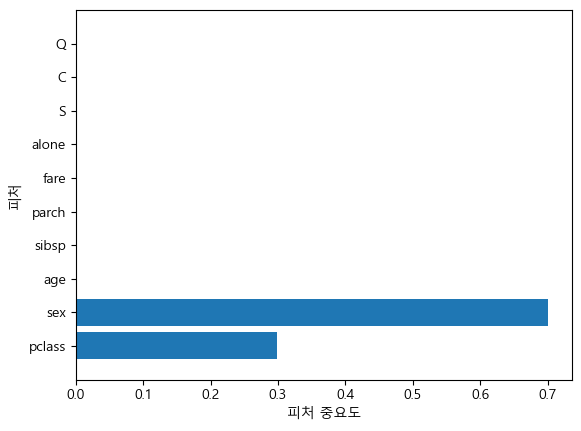

In [60]:
import numpy as np
import matplotlib.pyplot as plt

print("피처 중요도:\n", model.feature_importances_)
# max_depth=2이므로 중요도는 2가지 값만 나옴

plt.rcParams['font.family'] = "Malgun Gothic"
n_features = X_train.shape[1]

plt.barh(np.arange(n_features), model.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("피처 중요도")
plt.ylabel("피처")
plt.ylim(-1, n_features)

#### - 모델 그리기: 의사결정나무를 시각화하는 기능을 자체적으로 지원함

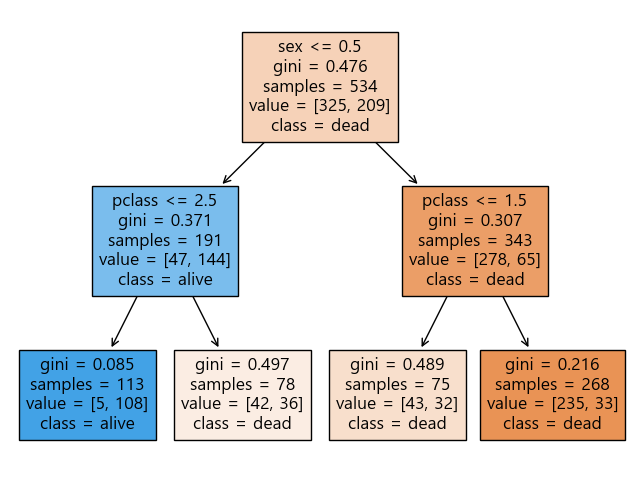

In [57]:
from sklearn.tree import plot_tree

label_val = {0: 'dead', 1: 'alive'}

plt.figure(figsize=(8,6))
plot_tree(model.fit(X_train, y_train), feature_names=X_train.columns, class_names=label_val, filled=True)
plt.show()

# filled=True : 색상값으로 나타내줌

## 서울지역 분류 실습 추가 예제
구역에 따라 동 분류

### 1. 라이브러리 임포트

In [61]:
import pandas as pd
import numpy as np

# sklearn 모델의 동일한 결과 출력을 위한 선언
np.random.seed(5)

### 2. 서울의 대표적인 구(district) 위치 데이터

In [121]:
district_dict_list = [
    {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
    {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
    {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
    {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
    {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
    {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
    {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
    {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
    {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
    {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
    {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
    {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
    {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
    {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
    {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
    {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
    {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
    {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
    {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
    {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}]
train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


### 3. 서울의 대표적인 동 위치 데이터

In [111]:
dong_dict_list = [
    {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
    {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
    {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
    {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
    {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
    {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
    {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
    {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
    {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
    {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
    {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
    {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
    {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
    {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
    {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
    {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
    {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
    {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'} ]
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


#### - 현재 가지고 있는 데이터에서 레이블의 개수 확인

In [112]:
train_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

In [113]:
test_df.label.value_counts()

Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: label, dtype: int64

#### - 경도와 위도의 평균과 편차 확인

In [114]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


In [115]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


In [116]:
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


### 4. 데이터 시각화

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### - 경도, 위도에 따른 데이터 시각화

Text(0.5, 1.0, 'District visualization in 2d plane')

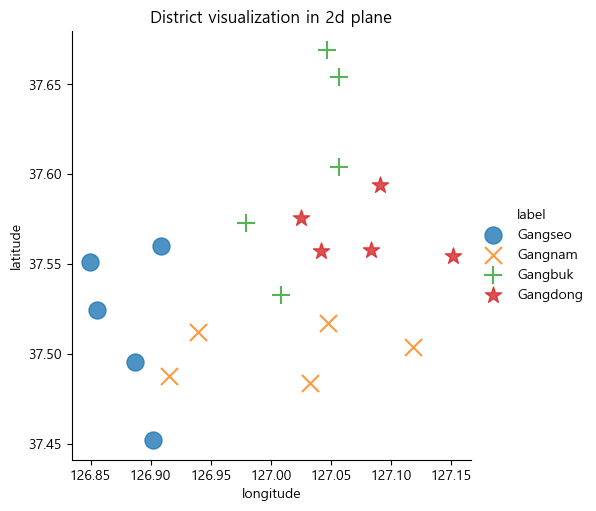

In [122]:
sns.lmplot(x='longitude', y='latitude', data=train_df, fit_reg=False, scatter_kws={"s": 150}, markers=["o", "x", "+", "*"], hue="label")

# titles
plt.title("District visualization in 2d plane")

### 5. 학습 및 테스트에 필요 없는 특징 제거

In [74]:
train_df.drop(['district'], axis=1, inplace=True)
test_df.drop(['dong'], axis=1, inplace=True)

In [75]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

In [76]:
X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [127]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01

    # 파라미터 설정
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # 학습 데이터를 챠트에 표시
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=200)

    # 챠트 제목
    plt.title("Decision surface of a decision tree",fontsize=16)

    # 챠트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)

    # x축의 이름과 폰트 크기 설정
    plt.xlabel('longitude',fontsize=16)

    # y축의 이름과 폰트 크기 설정
    plt.ylabel('latitude',fontsize=16)

    # 챠트 크기 설정
    plt.rcParams["figure.figsize"] = [7,5]

    # 챠트 폰트 크기 설정
    plt.rcParams["font.size"] = 14

    # x축 좌표상의 폰트 크기 설정
    plt.rcParams["xtick.labelsize"] = 14

    # y축 좌표상의 폰트 크기 설정
    plt.rcParams["ytick.labelsize"] = 14

    # 챠트 그리기
    plt.show()

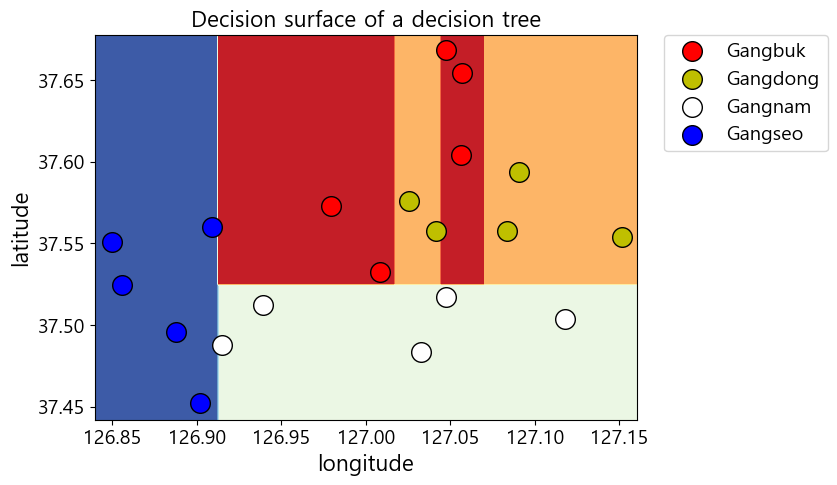

In [132]:
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)

clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)
display_decision_surface(clf,X_train, y_encoded)

### 6. 파라미터 설정한 모델의 결정 표면 시각화

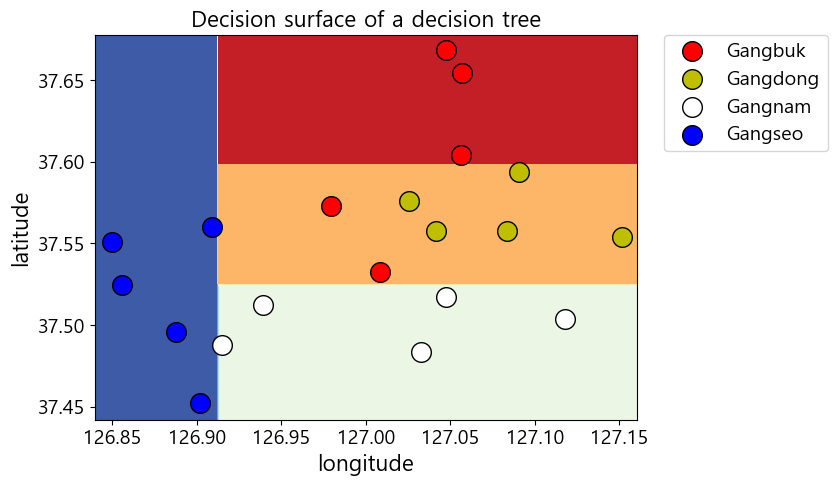

In [135]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=3, min_samples_leaf=3, random_state=5).fit(X_train, y_encoded.ravel())
display_decision_surface(clf, X_train, y_encoded)

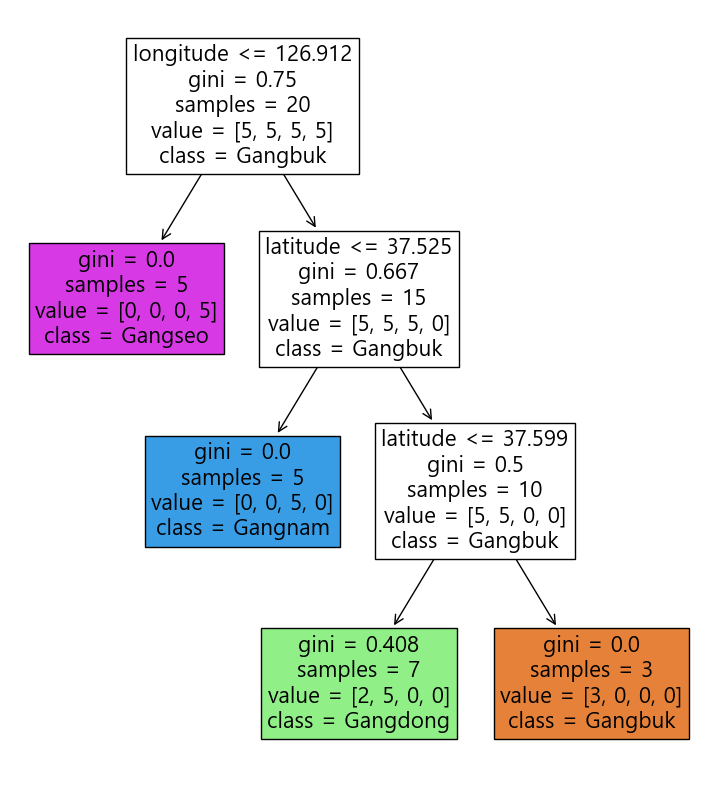

In [139]:
# 모델 그리기
from sklearn.tree import plot_tree

label_val = {0: 'Gangbuk', 1: 'Gangdong', 2: 'Gangnam', 3: 'Gangseo'}
plt.figure(figsize=(9,10))
plot_tree(clf.fit(X_train, y_encoded), feature_names=X_train.columns, class_names=label_val, filled=True)
plt.show()